# Final Project Submission

Please fill out:
* Student name: Marife Ramoran
* Student pace: self paced
* Scheduled project review date/time: 01 December 2023
* Instructor name: Hardik Idnani
* Blog post URL:
***


## Overview
***
The undertaking serves as a valuable showcase for applying the knowledge acquired during Phase 2 to real-world data. By employing data analysis and linear regression, our objective is to derive a minimum of three key insights that can inform decision-making regarding the profitability of renovating older homes. A crucial aspect involves comprehending the factors influencing house prices.

## Business Problem
***
The real estate agency seeks to offer strategic advice to potential homebuyers planning to acquire and renovate properties. This advice aims to pinpoint essential renovation priorities that can maximize the property's market value growth, along with providing estimates of value increments to optimize their resale potential.

## Data
***
The dataset utilized for this model comprises information from houses in King County, Washington, USA, which were sold between 2014 and 2015. It encompasses 21,597 entries, incorporating details about the house such as the number of bedrooms, bathrooms, and its rating (grade).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# I want to check the duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [7]:
# Now, I am eliminating duplicates while preserving the initial row for each duplicate entry.
data = data.drop_duplicates(keep= 'first', subset= ['id'])

To enhance data readability, we can omit the following variables, as they are not directly linked to the target variable "price":

- view: Indicates whether the house has been viewed.
- lat and long: Represent the coordinates of the house.
- zipcode: Unlikely to influence the outcome, as house prices post-renovation are not correlated with their zip codes.
- date: Indicates the sale date of the house.
- sqft_lot15 and sqft_living15: Reflect the size of other houses in the vicinity.
- id: Serves as the unique identification number for the listed house.
- yr_built: indicates which year the house was built

In [8]:
to_drop = ['view', 'lat', 'long', 'zipcode', 'date', 'sqft_lot15', 'sqft_living15', 'id', 'yr_built']
data = data.drop(to_drop, axis= 1)

In [9]:
# Let's examine whether there are any null values present in our dataset.
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3804
dtype: int64

In [10]:
# We discovered that the variable "sqft_basement" contains some unspecified values.
data['sqft_basement'].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
# We identified 454 instances of missing values in the "sqft_basement" data. 
# To address this, we will replace the "?" entries with 0 to render the data usable.
data['sqft_basement'] = data['sqft_basement'].replace('?',0)

In [12]:
# Observing that the "waterfront" variable contains some missing data, we can consider assigning a value of 0 to these entries to make the data usable.
data['waterfront'].unique()

array([nan,  0.,  1.])

In [13]:
# Upon examination, we have identified missing data that can be filled in with 0
data['waterfront'].fillna(value = 0, inplace = True)

In [14]:
# We've also identified missing data in the "yr_renovated" variable.
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
# Upon examination, we have detected missing data that can be filled in with 0
data['yr_renovated'].fillna(value = 0, inplace = True)

In [16]:
# Upon closer examination, using float in models is not optimal. 
# As a solution, we will multiply the bathroom values by 100, allowing for better utilization of the data.
data['bathrooms'] = data['bathrooms'] * 100

In [17]:
# We must convert the data into either integers or floats to facilitate its use in our analysis.
data['waterfront'] = data['waterfront'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(float).astype(int)
data['floors'] = data['floors'].astype(float).astype(int)
data['sqft_basement'] = data['sqft_basement'].astype(float).astype(int)

In [18]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,211.842904,2083.132633,1.512804e+04,1.447993,0.006816,3.410784,7.662792,1791.170215,285.904342,68.956723
std,3.679311e+05,0.925405,76.871996,918.808412,4.153080e+04,0.552110,0.082280,0.650035,1.171971,828.692965,440.008202,364.552298
min,7.800000e+04,1.000000,50.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,0.000000
25%,3.225000e+05,3.000000,175.000000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,225.000000,1920.000000,7.614000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,250.000000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,0.000000
max,7.700000e+06,33.000000,800.000000,13540.000000,1.651359e+06,3.000000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [19]:
# We aim to streamline the data by transforming the information about whether the building has been renovated. 
# Instead of specifying the year, we will simplify it to a straightforward True or False designation.
check = lambda x : x != 0
data['reno_bool'] = check(data['yr_renovated'])

In [20]:
# Since many houses lack a basement, we can modify the variable to "base_flag" to prevent confusion.
data['base_flag'] = check (data['sqft_basement'])

In [21]:
data['reno_bool'] = data['reno_bool'].astype(int)
data['base_flag'] = data['base_flag'].astype(int)

In [22]:
# Now, we can eliminate the columns used in creating our new variables.
data = data.drop(['sqft_basement', 'yr_renovated'], axis=1)

In [23]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,reno_bool,base_flag
0,221900.0,3,100,1180,5650,1,0,3,7,1180,0,0
1,538000.0,3,225,2570,7242,2,0,3,7,2170,1,1
2,180000.0,2,100,770,10000,1,0,3,6,770,0,0
3,604000.0,4,300,1960,5000,1,0,5,7,1050,0,1
4,510000.0,3,200,1680,8080,1,0,3,8,1680,0,0


## Examine the outliers

We must identify and exclude any outliers in our dataset to enhance its applicability.
***


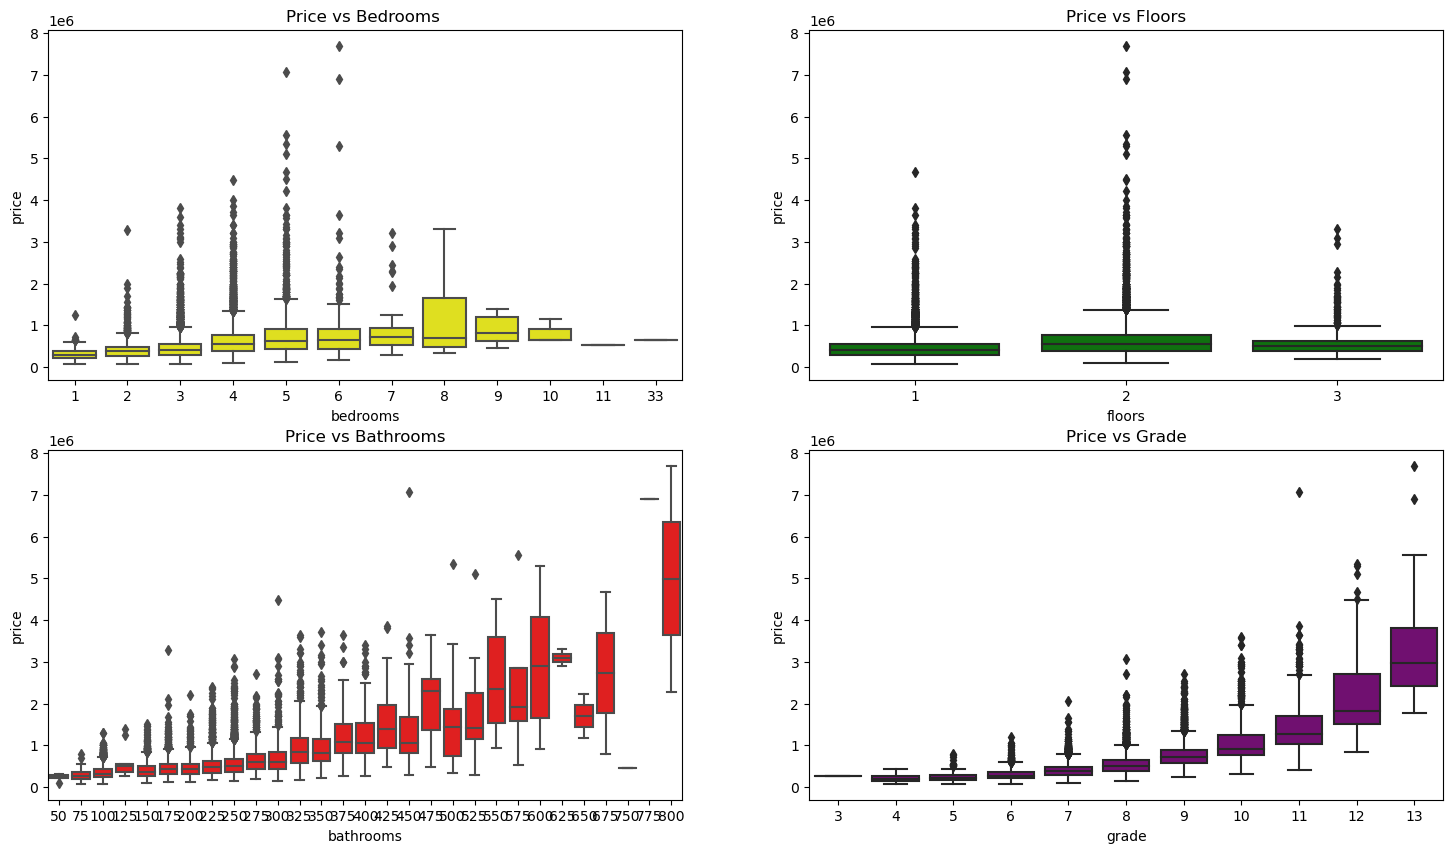

In [24]:
# Examine the distribution of the base through percentiles and median for visualizing outliers.

fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='yellow', ax=ax)
ax.set_title("Price vs Bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='green', ax=ax)
ax.set_title("Price vs Floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='red', ax=ax)
ax.set_title("Price vs Bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='purple', ax=ax)
ax.set_title("Price vs Grade")

plt.savefig(".\images\outliers.png", dpi = 150, bbox_inches = 'tight')

plt.show()

In [25]:
# We will include all variables except for "reno_bool" and "waterfront" in our analysis. 
# This is essential to assess whether renovations can influence price increases.

columns= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'base_flag']
outliers=[]

for col in columns:
    mean=np.mean(data[col])
    std=np.std(data[col])
    for i in range(len(data)):
        item = data[col].iloc[i]
        z_score=(item-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)

outliers = set(outliers)
outliers = list(outliers)

# print (col)

In [26]:
# We can now eliminate the outliers to create a cleaner dataset.
data.drop(data.index[outliers], inplace= True)

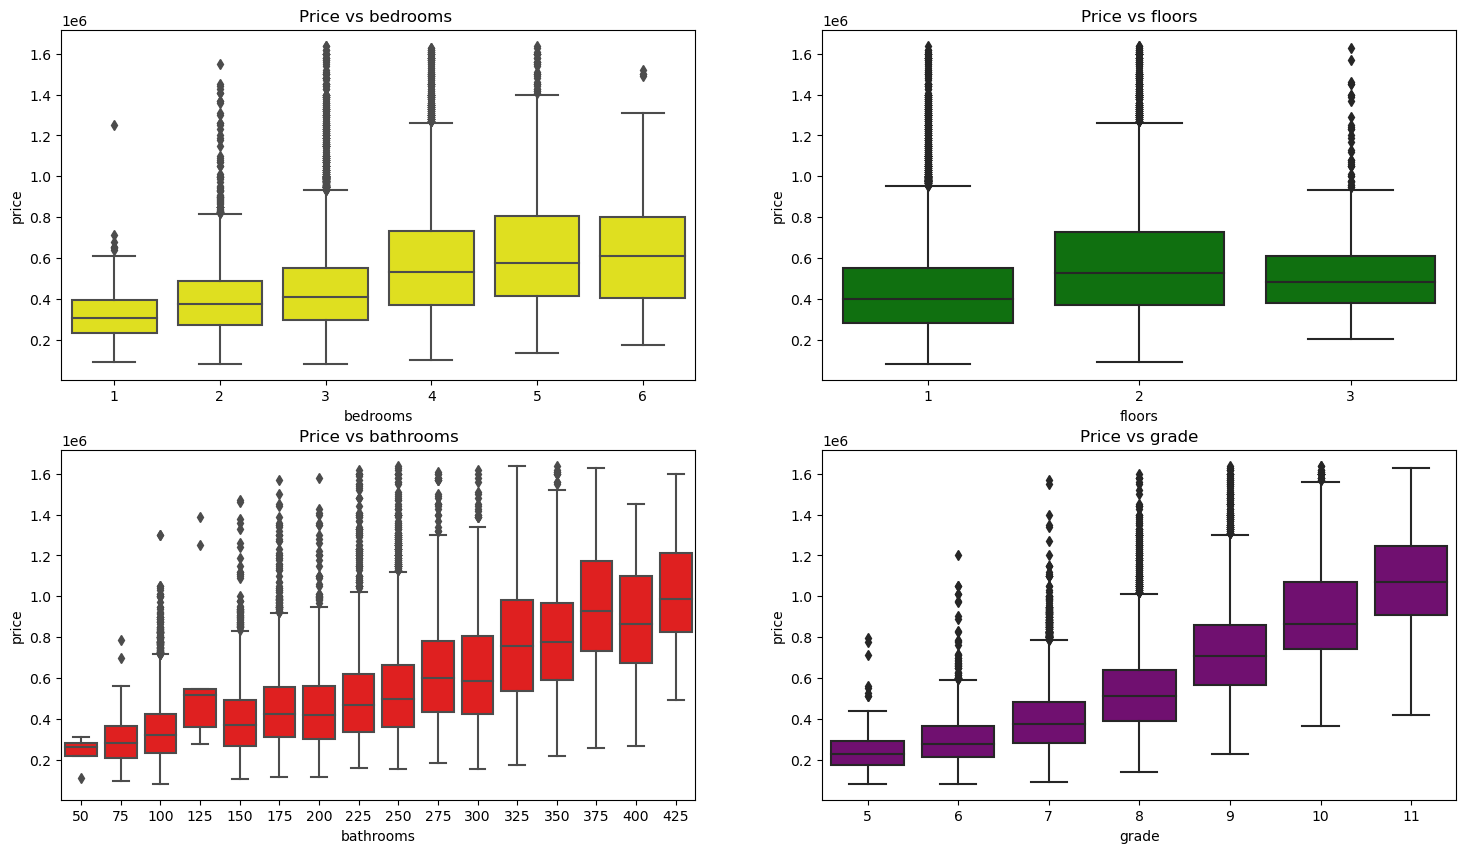

In [27]:
# I want to check the boxplot once more for the outliers.

# Examine the distribution of the base through percentiles and median for visualizing potential outliers.


fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='yellow', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='green', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='red', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='purple', ax=ax)
ax.set_title("Price vs grade")

plt.savefig(".\images\outliers.png", dpi = 150, bbox_inches = 'tight')

plt.show()

## Model 1
***

In [28]:
outcome = 'price'
predictors = data.drop(['price'], axis= 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [29]:
model= ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2105.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:48:07   Log-Likelihood:            -2.7391e+05
No. Observations:               20341   AIC:                         5.478e+05
Df Residuals:                   20329   BIC:                         5.479e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.495e+05   1.39e+04    -46.671      0.000   -6.77e+05   -6.22e+05
bedrooms    -2.046e+04   1825.138    -11.211      0.000    -2.4e+04   -1.69e+04
bathrooms    -211.2116     28.452     -7.423      0.000    -266.980    -155.444
sqft_living   127.1091      5.613     22.646      0.000     116.107     138.111
sqft_lot       -1.0910      0.094    -11.574      0.000      -1.276      -0.906
floors      -5711.7855   3113.702     -1.834      0.067   -1.18e+04     391.321
waterfront   3.376e+05   2.01e+04     16.784      0.000    2.98e+05    3.77e+05
condition    5.304e+04   1979.682     26.792      0.000    4.92e+04    5.69e+04
grade        1.077e+05   1808.823     59.537      0.000    1.04e+05    1.11e+05
sqft_above      3.4359      6.058      0.567      0.571      -8.439      15.310
reno_bool    1.315e+05   6807.655     19.315      0.000    1.18e+05    1.45e+05
base_flag    4.685e+04   4520.509     10.364      0.000     3.8e+04    5.57e+04
==============================================================================
Omnibus:                     3318.397   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7929.343
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       5.429   Cond. No.                     2.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary on Model 1

Currently, the P-values suggest that all independent variables, except for sqft_above, are statistically significant. Although the adjusted R-squared is satisfactory, there is room for improvement through the handling of categorical data, log transformation, and normalization.

The skewness at 0.860 indicates a positive skew, while the kurtosis at 5.812 signifies a leptokurtic curve. It suggests the presence of outliers, but these may be necessary for extracting valuable information from certain columns and rendering them usable.

### Checking assumptions
***

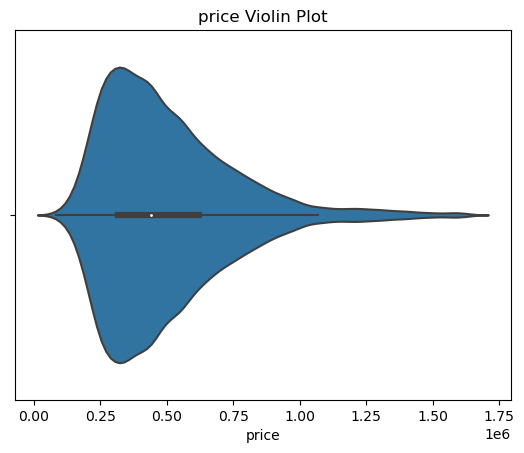

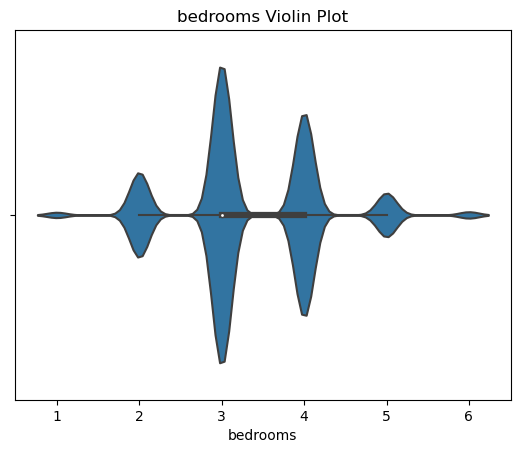

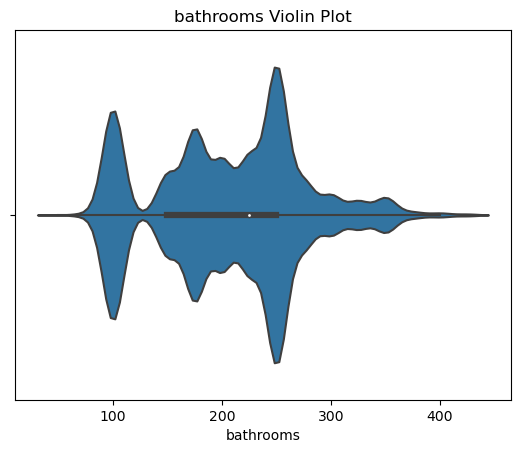

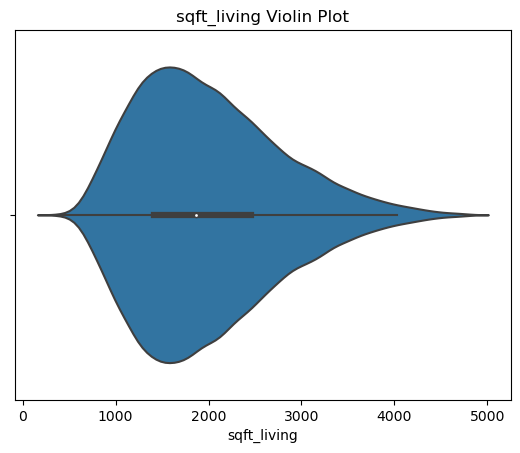

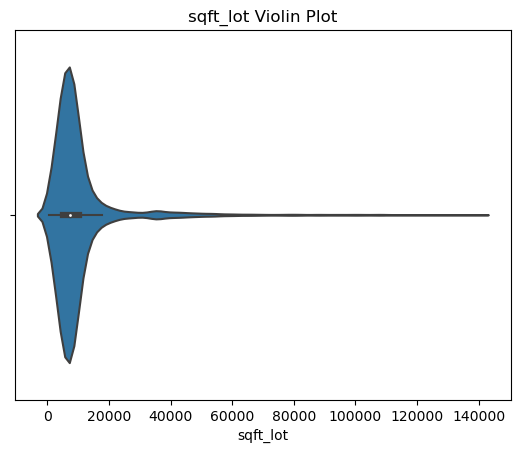

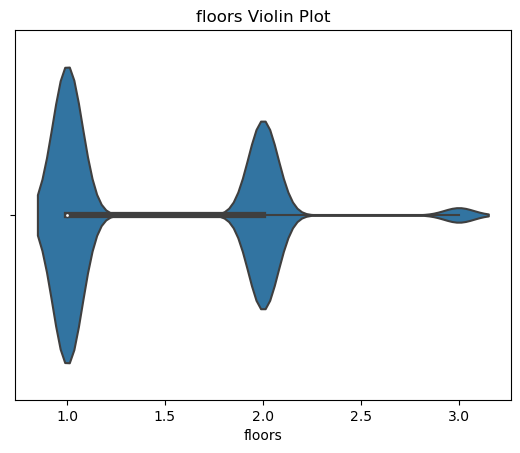

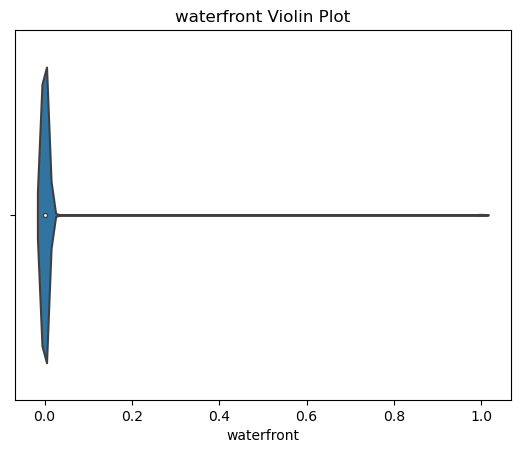

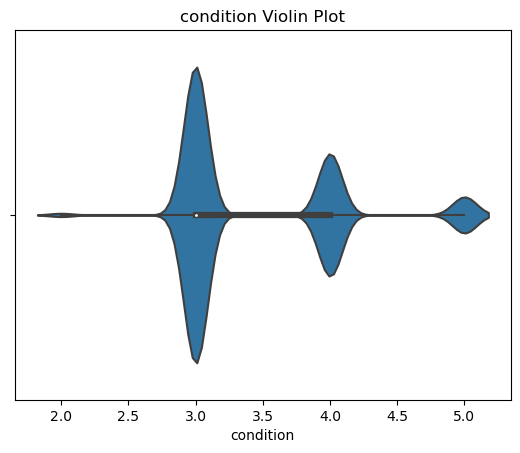

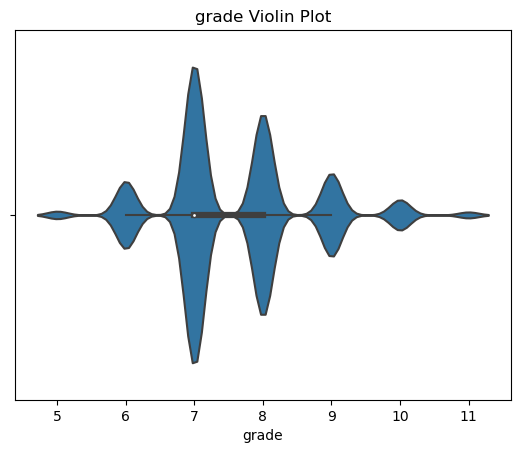

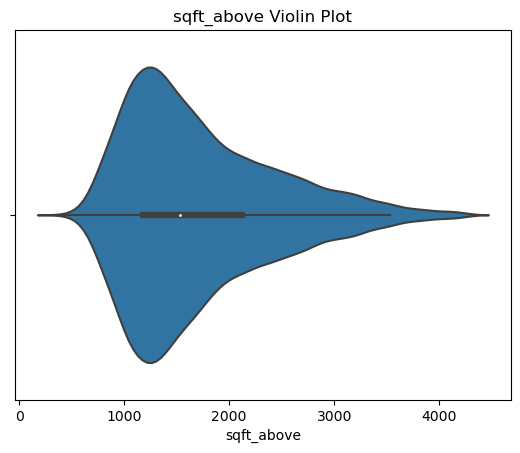

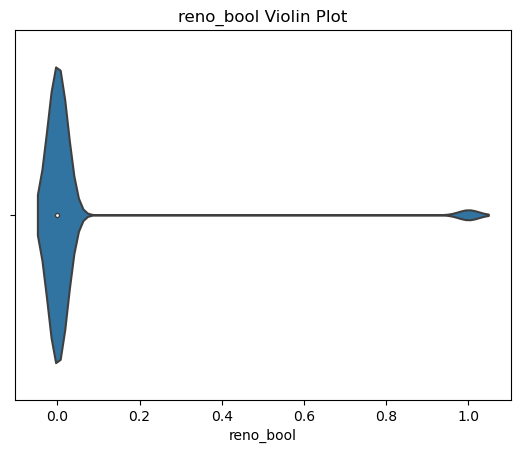

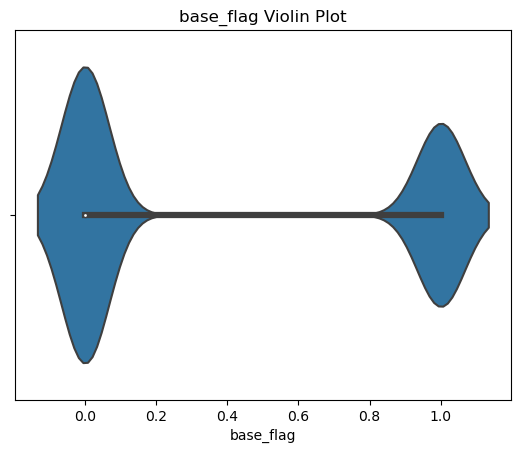

In [69]:
for column in data.columns:

    sns.violinplot(x=data[column])
    plt.title(column + ' Violin Plot')
    plt.show()

## Dealing with Categorical Data
***

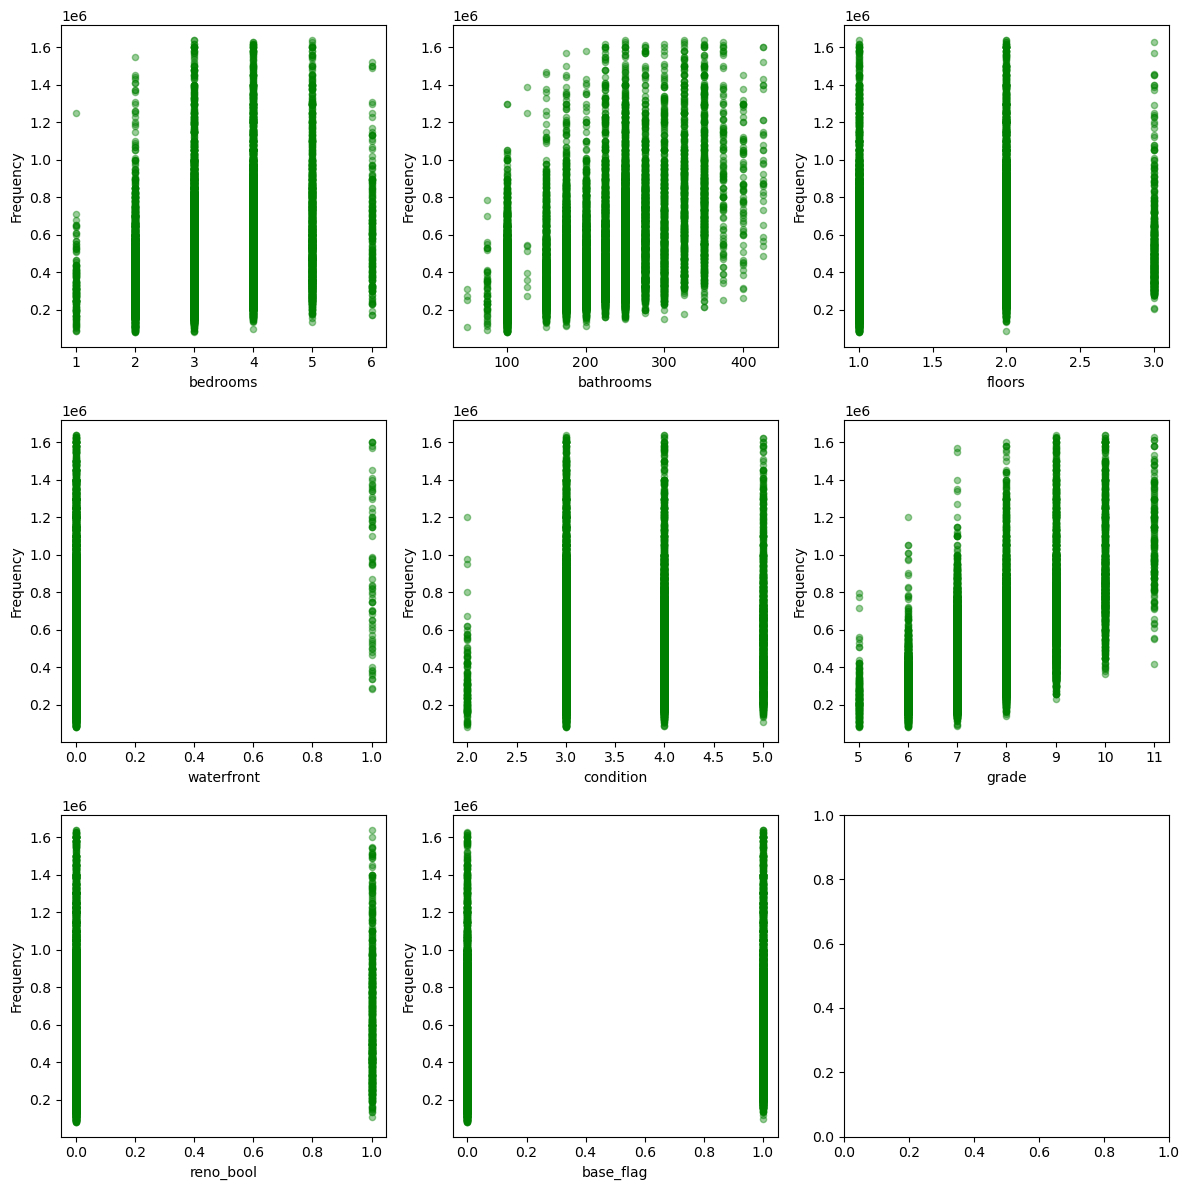

In [31]:
# We should create a histogram to confirm whether the data at hand is categorical.

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'reno_bool', 'base_flag']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    data.plot(kind='scatter', x=column, y='price', ax=axs[row, col], alpha=00.4, color='green')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig(".\images\categorical.png", dpi = 150, bbox_inches = 'tight')

plt.show()

Observing the clustered distribution in the scatter plot for the columns: 

- bedrooms 
- bathrooms
- floors
- waterfront
- condition
- grade
- reno_bool
- base_flag

It becomes evident that these are categorical data. To utilize them effectively, we should create dummy variables.

In [32]:
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'reno_bool', 'base_flag']

In [33]:
bed_dummies = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bath_dummies = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
flr_dummies = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)
wtr_dummies = pd.get_dummies(data['waterfront'], prefix='wtr', drop_first=True)
cond_dummies = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
reno_dummies = pd.get_dummies(data['reno_bool'], prefix='reno', drop_first=True)
base_dummies = pd.get_dummies(data['base_flag'], prefix='base', drop_first=True)

In [34]:
dummies = pd.concat([bed_dummies, bath_dummies, flr_dummies, wtr_dummies, cond_dummies, grade_dummies, reno_dummies, base_dummies], axis=1)

In [35]:
bed_dummies = pd.get_dummies(data['bedrooms'], prefix='bed')
bath_dummies = pd.get_dummies(data['bathrooms'], prefix='bath')
flr_dummies = pd.get_dummies(data['floors'], prefix='flr')
wtr_dummies = pd.get_dummies(data['waterfront'], prefix='wtr')
cond_dummies = pd.get_dummies(data['condition'], prefix='cond')
grade_dummies = pd.get_dummies(data['grade'], prefix='grade')
reno_dummies = pd.get_dummies(data['reno_bool'], prefix='reno')

base_dummies = pd.get_dummies(data['base_flag'], prefix='base')

In [36]:
dummies_full = pd.concat([bed_dummies, bath_dummies, flr_dummies, wtr_dummies, cond_dummies, grade_dummies, reno_dummies, base_dummies], axis=1)

In [37]:
data_1 = data.drop(categorical, axis=1)

## Multicollinearity
***
To enhance model performance and ensure accurate coefficients, it is essential to eliminate highly correlated variables.

In [38]:
data_pred = data_1.iloc[:, 1:]

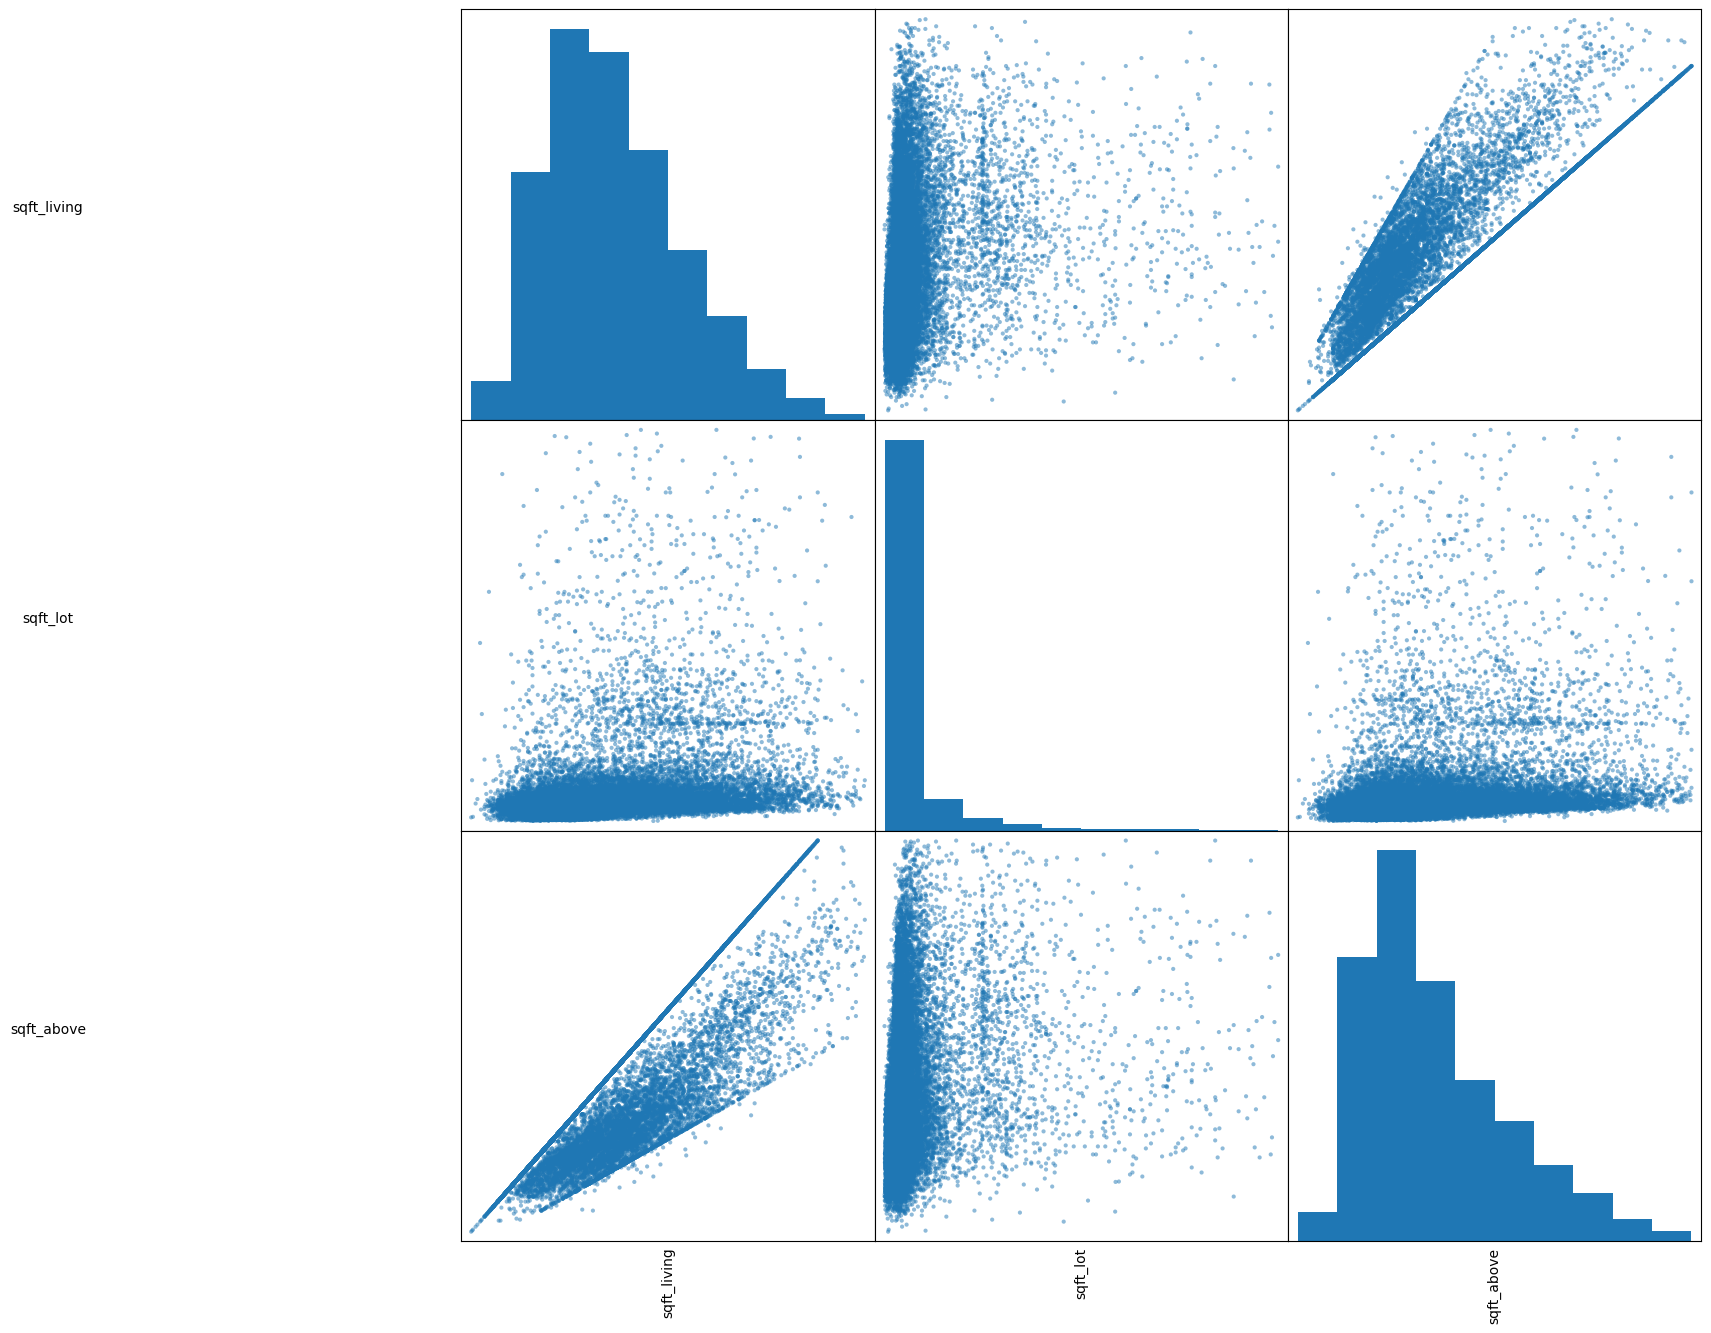

In [39]:
sm = pd.plotting.scatter_matrix(data_pred,figsize  = [16, 16]);

# Rotate the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#Consider adjusting the label offset when rotating to avoid overlapping in the figure.
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

# Conceal the ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [40]:
# Present the correlation in numerical format.
data_pred.corr()

,sqft_living,sqft_lot,sqft_above
sqft_living,1.000000,0.219082,0.84521
sqft_lot,0.219082,1.000000,0.20770
sqft_above,0.845210,0.207700,1.00000


In [41]:
abs(data_pred.corr()) > 0.75

,sqft_living,sqft_lot,sqft_above
sqft_living,True,False,True
sqft_lot,False,True,False
sqft_above,True,False,True


In [42]:
# This will display pairs with identical correlation values, preventing multiple appearances.
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Create a new column named "pairs" by zipping the variable name columns, 
# which were initially named "level_0" and "level_1" by default.
df['pairs'] = list(zip(df.level_0, df.level_1))

# Set the index to pairs
df.set_index(['pairs'], inplace = True)

# Drop ther columns in "levels"
df.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename the correlation column to "cc" instead of "0".
df.columns = ['cc']

# Remove duplicates. 
# Exercise caution, especially if you have variables that are perfectly correlated with others aside from themselves, 
# as this action could be risky.
df.drop_duplicates(inplace=True)

In [43]:
df[(df.cc>0.75) & (df.cc < 1.0)]

,cc
pairs,
"(sqft_living, sqft_above)",0.84521


## Dealing with Multicollinearity
***
We identified a high correlation between the variables "sqft_above" and "sqft_living." It is appropriate to address this by dropping one variable from the pair. In this case, we will eliminate "sqft_above," given that its description corresponds to the square footage of the house.

In [44]:
dt = data_1.drop(['sqft_above'], axis= 1)

In [45]:
dt.head()

,price,sqft_living,sqft_lot
0,221900.0,1180,5650
1,538000.0,2570,7242
2,180000.0,770,10000
3,604000.0,1960,5000
4,510000.0,1680,8080


## Model 2
***

In [46]:
dt_1_dummies = pd.concat([dt, dummies], axis= 1)

In [47]:
dt_1_dummies.head()

,price,sqft_living,sqft_lot,bed_2,bed_3,bed_4,bed_5,bed_6,bath_75,bath_100,...,cond_4,cond_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,reno_1,base_1
0,221900.0,1180,5650,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,7242,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,180000.0,770,10000,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,1960,5000,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,510000.0,1680,8080,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
predictors = dt_1_dummies.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [49]:
model = ols(formula = formula, data = dt_1_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     707.7
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:48:10   Log-Likelihood:            -2.7337e+05
No. Observations:               20341   AIC:                         5.468e+05
Df Residuals:                   20304   BIC:                         5.471e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8880.3248   8.52e+04     -0.104      0.917   -1.76e+05    1.58e+05
sqft_living   120.6559      3.071     39.284      0.000     114.636     126.676
sqft_lot       -1.0623      0.092    -11.488      0.000      -1.244      -0.881
bed_2       -6399.8661   1.35e+04     -0.474      0.635   -3.29e+04    2.01e+04
bed_3       -5.026e+04   1.35e+04     -3.729      0.000   -7.67e+04   -2.38e+04
bed_4       -5.679e+04   1.38e+04     -4.127      0.000   -8.38e+04   -2.98e+04
bed_5       -5.805e+04   1.45e+04     -3.999      0.000   -8.65e+04   -2.96e+04
bed_6       -6.037e+04   1.82e+04     -3.313      0.001   -9.61e+04   -2.47e+04
bath_75      9.278e+04   8.61e+04      1.077      0.281   -7.61e+04    2.62e+05
bath_100     1.168e+05   8.33e+04      1.403      0.161   -4.64e+04     2.8e+05
bath_125     1.383e+05      1e+05      1.382      0.167   -5.78e+04    3.34e+05
bath_150     9.195e+04   8.34e+04      1.103      0.270   -7.15e+04    2.55e+05
bath_175     8.647e+04   8.33e+04      1.038      0.299   -7.69e+04     2.5e+05
bath_200     9.046e+04   8.34e+04      1.085      0.278    -7.3e+04    2.54e+05
bath_225     7.772e+04   8.34e+04      0.932      0.351   -8.57e+04    2.41e+05
bath_250      4.87e+04   8.34e+04      0.584      0.559   -1.15e+05    2.12e+05
bath_275     7.819e+04   8.35e+04      0.937      0.349   -8.54e+04    2.42e+05
bath_300     8.902e+04   8.36e+04      1.065      0.287   -7.48e+04    2.53e+05
bath_325     1.167e+05   8.37e+04      1.393      0.164   -4.74e+04    2.81e+05
bath_350     1.043e+05   8.37e+04      1.247      0.212   -5.97e+04    2.68e+05
bath_375     1.943e+05    8.5e+04      2.286      0.022    2.77e+04    3.61e+05
bath_400     1.016e+05   8.58e+04      1.184      0.236   -6.66e+04     2.7e+05
bath_425     1.778e+05   8.84e+04      2.012      0.044    4601.006    3.51e+05
flr_2       -1.191e+04   3633.602     -3.277      0.001    -1.9e+04   -4785.042
flr_3        5.127e+04   7793.927      6.578      0.000     3.6e+04    6.65e+04
wtr_1        3.257e+05   1.97e+04     16.547      0.000    2.87e+05    3.64e+05
cond_3       1.631e+04   1.39e+04      1.176      0.240   -1.09e+04    4.35e+04
cond_4       6.337e+04   1.39e+04      4.548      0.000    3.61e+04    9.07e+04
cond_5       1.302e+05   1.44e+04      9.061      0.000    1.02e+05    1.58e+05
grade_6      3.825e+04    1.2e+04      3.187      0.001    1.47e+04    6.18e+04
grade_7      1.118e+05   1.18e+04      9.433      0.000    8.85e+04    1.35e+05
grade_8      2.153e+05   1.22e+04     17.612      0.000    1.91e+05    2.39e+05
grade_9      3.648e+05   1.29e+04     28.366      0.000     3.4e+05     3.9e+05
grade_10     4.841e+05    1.4e+04     34.517      0.000    4.57e+05    5.12e+05
grade_11     5.988e+05   1.84e+04     32.607      0.000    5.63e+05    6.35e+05
reno_1       1.251e+05   6666.666     18.76

### Summary on Model 2 

Addressing multicollinearity resulted in an increase in the R-squared value, indicating that we are moving in the right direction.

## Applying log transformation and normalization
***

/var/folders/zr/m5b0ldvs7695p_h8w70ndwc40000gn/T/ipykernel_52076/3211950891.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dt.hist(ax = ax);


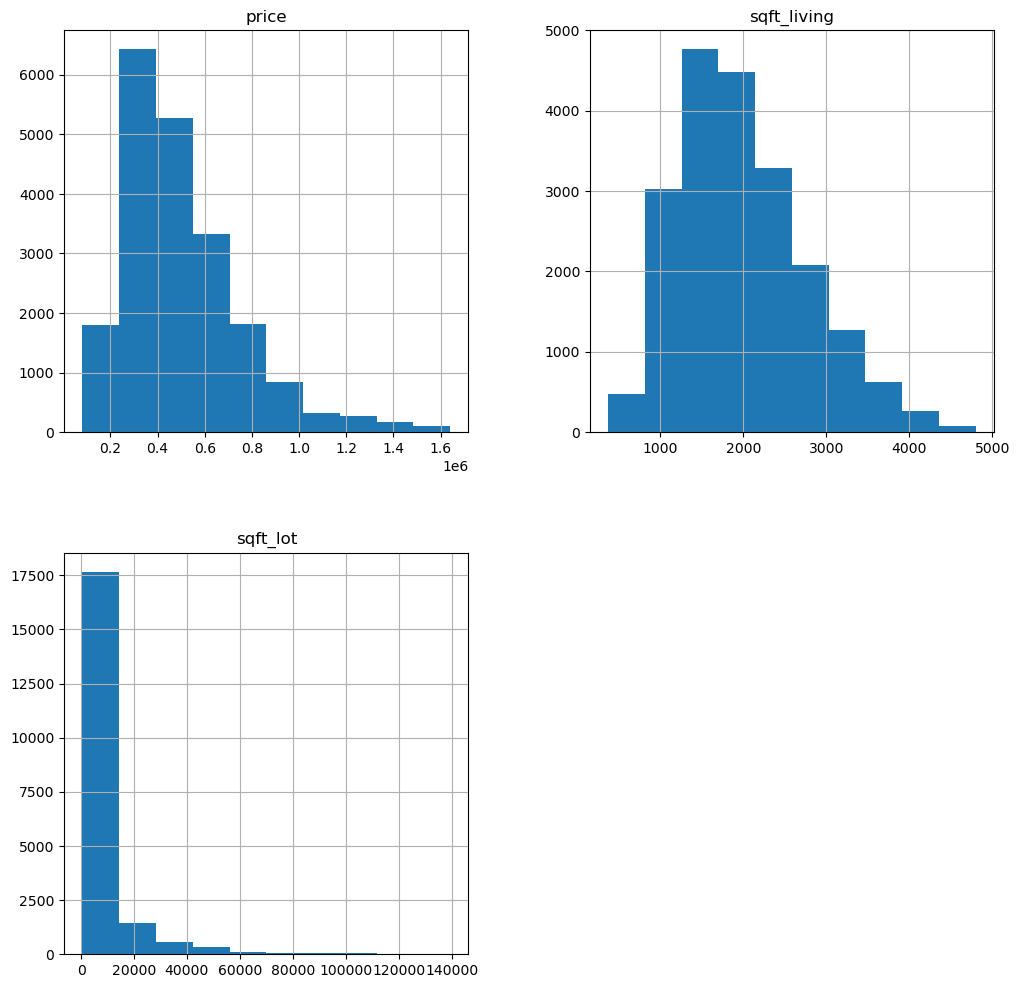

In [50]:
# We aim to visualize our data through a histogram. 
# Upon examination, I propose performing a log transformation and normalization 
# to bring the mean, median, and mode closer to zero.

fig = plt.figure(figsize = (12,12))
ax = fig.gca()
dt.hist(ax = ax);

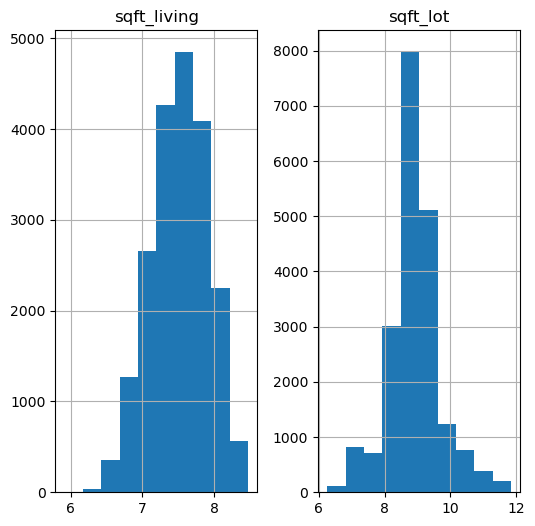

In [51]:
# Let's examine the data after the transformation.

data_log = pd.DataFrame([])
data_log['sqft_living'] = np.log(dt['sqft_living'])
data_log['sqft_lot'] = np.log(dt['sqft_lot'])
data_log.hist(figsize = [6, 6]);

In [52]:
log_living = data_log['sqft_living']
log_lot = data_log['sqft_lot']

# We can normalize our data

scaled_living = (log_living - np.mean(log_living)) / np.sqrt(np.var(log_living))
scaled_lot = (log_lot - np.mean(log_lot)) / np.sqrt(np.var(log_lot))

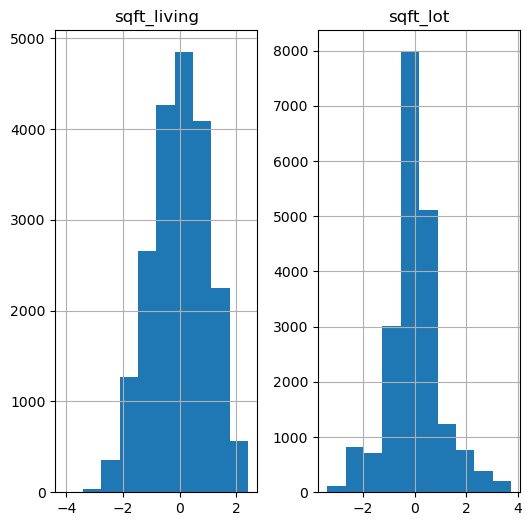

In [53]:
# Now, let's assess the current state of our data.

data_cont_scaled = pd.DataFrame([])

data_cont_scaled['sqft_living'] = scaled_living
data_cont_scaled['sqft_lot'] = scaled_lot

data_cont_scaled.hist(figsize = [6, 6]);

## Model 3
***

In [54]:
# Let's evaluate our model

dt_1 = pd.concat([dt['price'] ,data_cont_scaled, dummies], axis = 1)

In [55]:
predictors = dt_1.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [56]:
model = ols(formula = formula, data = dt_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     712.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:48:11   Log-Likelihood:            -2.7333e+05
No. Observations:               20341   AIC:                         5.467e+05
Df Residuals:                   20304   BIC:                         5.470e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.123e+05   8.52e+04      3.665      0.000    1.45e+05    4.79e+05
sqft_living  1.014e+05   2529.251     40.075      0.000    9.64e+04    1.06e+05
sqft_lot    -2.901e+04   1497.178    -19.374      0.000   -3.19e+04   -2.61e+04
bed_2       -3.283e+04   1.35e+04     -2.431      0.015   -5.93e+04   -6355.299
bed_3       -8.306e+04   1.36e+04     -6.121      0.000    -1.1e+05   -5.65e+04
bed_4       -8.775e+04   1.39e+04     -6.304      0.000   -1.15e+05   -6.05e+04
bed_5        -8.22e+04   1.47e+04     -5.603      0.000   -1.11e+05   -5.34e+04
bed_6       -8.219e+04   1.83e+04     -4.482      0.000   -1.18e+05   -4.62e+04
bath_75      1.098e+05    8.6e+04      1.276      0.202   -5.88e+04    2.78e+05
bath_100     1.174e+05   8.31e+04      1.412      0.158   -4.55e+04     2.8e+05
bath_125     1.049e+05   9.98e+04      1.051      0.293   -9.08e+04    3.01e+05
bath_150     7.751e+04   8.32e+04      0.931      0.352   -8.56e+04    2.41e+05
bath_175     6.968e+04   8.32e+04      0.838      0.402   -9.34e+04    2.33e+05
bath_200     6.938e+04   8.32e+04      0.834      0.404   -9.37e+04    2.32e+05
bath_225     6.295e+04   8.32e+04      0.756      0.449      -1e+05    2.26e+05
bath_250     3.177e+04   8.32e+04      0.382      0.703   -1.31e+05    1.95e+05
bath_275     6.539e+04   8.33e+04      0.785      0.433   -9.79e+04    2.29e+05
bath_300     7.558e+04   8.34e+04      0.906      0.365   -8.79e+04    2.39e+05
bath_325     1.125e+05   8.36e+04      1.346      0.178   -5.13e+04    2.76e+05
bath_350     1.054e+05   8.35e+04      1.262      0.207   -5.83e+04    2.69e+05
bath_375     1.987e+05   8.48e+04      2.343      0.019    3.24e+04    3.65e+05
bath_400     1.124e+05   8.56e+04      1.313      0.189   -5.54e+04     2.8e+05
bath_425     2.025e+05   8.82e+04      2.297      0.022    2.97e+04    3.75e+05
flr_2       -3.129e+04   3815.818     -8.201      0.000   -3.88e+04   -2.38e+04
flr_3       -4473.8620   8380.682     -0.534      0.593   -2.09e+04     1.2e+04
wtr_1        3.378e+05   1.97e+04     17.159      0.000    2.99e+05    3.76e+05
cond_3       8779.6520   1.38e+04      0.634      0.526   -1.84e+04    3.59e+04
cond_4        5.88e+04   1.39e+04      4.228      0.000    3.15e+04    8.61e+04
cond_5       1.225e+05   1.44e+04      8.539      0.000    9.44e+04    1.51e+05
grade_6      1.943e+04    1.2e+04      1.620      0.105   -4081.559    4.29e+04
grade_7      7.796e+04   1.19e+04      6.548      0.000    5.46e+04    1.01e+05
grade_8      1.813e+05   1.23e+04     14.702      0.000    1.57e+05    2.05e+05
grade_9      3.457e+05   1.29e+04     26.700      0.000     3.2e+05    3.71e+05
grade_10     4.871e+05    1.4e+04     34.769      0.000     4.6e+05    5.15e+05
grade_11      6.22e+05   1.82e+04     34.110      0.000    5.86e+05    6.58e+05
reno_1       1.254e+05   6654.320     18.84

### Summary of Model 3 and Comparison

Following the transformation of our data and reintroduction of categorical variables, the model appears robust. The R-squared value of 0.619 is considered good, suggesting that the model is likely at its optimal fit. We can now proceed with model validation.

## Validation
***

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
y = np.log(dt_1['price'])
x = dt_1.drop('price', axis = 1)

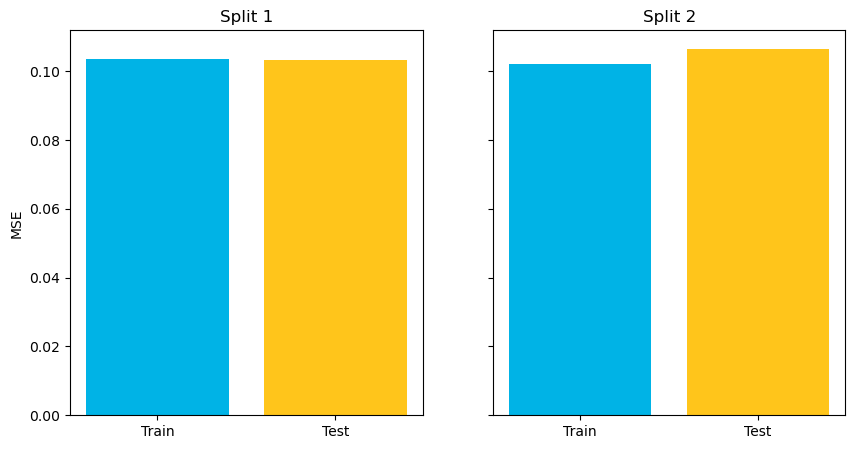

In [59]:
# Configure data and model set up

linreg = LinearRegression()

# Split with random_state 87
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, random_state=87, test_size=0.33)
linreg.fit(x_train_1, y_train_1)
train_mse_1 = mean_squared_error(y_train_1, linreg.predict(x_train_1))
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(x_test_1))

# Split with random_state 41
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, random_state=41, test_size=0.33)
linreg.fit(x_train_2, y_train_2)
train_mse_2 = mean_squared_error(y_train_2, linreg.predict(x_train_2))
test_mse_2 = mean_squared_error(y_test_2, linreg.predict(x_test_2))

# Plot metrics
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
left.bar(labels, [train_mse_1, test_mse_1], color=colors)
left.set_title("Split 1")
left.set_ylabel("MSE")
right.bar(labels, [train_mse_2, test_mse_2], color=colors)
right.set_title("Split 2");

### Train-Test Split Analysis

It is evident that the train and test splits for both random_state 87 and random_state 41 exhibit only minimal differences.

In [60]:
# Now, let's evaluate it with random_state 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [61]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
LinearRegression()

LinearRegression()

## Calculate the Mean Squared Error
***

In [62]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

In [63]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [64]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.10386598952456463
Test Mean Squared Error: 0.10185845860770103


In [65]:
train_mse - test_mse

0.0020075309168636063

## R-squared value of the model
 
***

In [66]:
print('R2 score: {:.2%}'.format(r2_score(y_test, y_hat_test)))

R2 score: 55.14%


### Comments ond Model Validation

The discrepancy is so minimal that rounding it to two decimal places results in 0.00. This suggests that the model is likely at its optimal fit.

In [67]:
# Obtain the top 5 variables

from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(x_train, y_train.values)

selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False])

In [68]:
# Obtain top 3 variables
selected_columns = x_train.columns[selector.support_]
linreg.fit(x_train[selected_columns], y_train)
print(selected_columns)

Index(['grade_9', 'grade_10', 'grade_11'], dtype='object')


## Evaluation 
***
After three iterations, we discovered that the final model utilized the top independent variables. Using sklearn's feature selector, we identified variables with a strong relationship with the dependent variable, price. The top variables influencing the price were:

- grade_11
- grade_10
- grade_9

Addressing the key renovation properties to maximize the property's market value, we identified the top five contributors:

1. sqft_living: Increasing the square footage of the home can raise the price by 83,010.
2. flr_3: Having a three-story house would increase the property's worth by 66,690.
3. bath_425: Adding 4.25 bathrooms can increase the property's worth by 304,400.
4. wtr_1: Having a waterfront view will increase the property's worth by 305,700.
5. grade_11: Achieving a building grade of 11 in King County can increase the property's worth by 714,500.

This linear regression model effectively addresses the business problem of identifying key renovation properties to maximize the property's market value.

While the model provides meaningful insights, validating the outliers with more data could enhance its accuracy. It is noteworthy that the results align with real-world expectations, providing a sensible justification for the price increases associated with the identified factors.

## Conclusion
***

The King County grading system used in this dataset reflects the quality of the houses, ranging from grade 1 to 13. The model results indicate that Grades 11, 10, and 9 are the top three in the ranking system, aligning with the realistic expectations of higher-quality renovations. Renovating a house to attain Grade 11, 10, or 9 not only increases its value but also suggests that additional improvements can further enhance the property's worth.

(source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

In summary, the primary drivers for maximizing a house's market value include:

1. Investing in high-quality materials and luxury options during renovation.
2. Securing a house with a waterfront view, if feasible.
3. Adding more bathrooms.